**Train Test and Cross Validation**

In [47]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

data_path = '/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv'
df = pd.read_csv(data_path)

print(f"🔍 NN - Original dataset shape: {df.shape}")

df = df.dropna()

print(f"🧹 NN - After dropping NaNs: {df.shape}")

X = df.drop('Diabetes Status', axis=1)
y = df['Diabetes Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"📊 NN - Final dataset shape after scaling: {X_scaled.shape}")

nn = MLPClassifier(
    hidden_layer_sizes=(6, 6, 6, 4),  
    max_iter=3000,  
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

nn_kfold_scores = cross_val_score(nn, X_scaled, y, cv=kf, scoring='accuracy')

nn.fit(X_scaled, y)
y_pred = nn.predict(X_scaled)

print(f"✅ NN - K-Fold Mean Accuracy: {nn_kfold_scores.mean():.4f}")
print("📌 NN Classification Report:")
print(classification_report(y, y_pred))
print("🟦 NN Confusion Matrix:")
print(confusion_matrix(y, y_pred))


🔍 NN - Original dataset shape: (2142, 11)
🧹 NN - After dropping NaNs: (1481, 11)
📊 NN - Final dataset shape after scaling: (1481, 10)
✅ NN - K-Fold Mean Accuracy: 0.6712
📌 NN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62       660
           1       0.70      0.81      0.75       821

    accuracy                           0.70      1481
   macro avg       0.70      0.69      0.69      1481
weighted avg       0.70      0.70      0.69      1481

🟦 NN Confusion Matrix:
[[369 291]
 [152 669]]


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

valid_path = "/workspaces/Final-Year-Project/Cleaned Data/ValidationData.csv"

df_valid = pd.read_csv(valid_path)
df_valid = df_valid.dropna()

X_valid = df_valid.drop('Diabetes Status', axis=1)
y_valid = df_valid['Diabetes Status']

X_valid_scaled = scaler.transform(X_valid)

print(f"🧪 NN - Validation dataset shape: {X_valid.shape}")

y_pred_valid = nn.predict(X_valid_scaled)

print(f"📌 NN - Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

print("🟦 NN - Validation Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))


🧪 NN - Validation dataset shape: (159, 10)
📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        76
           1       0.71      0.84      0.77        83

    accuracy                           0.74       159
   macro avg       0.75      0.74      0.74       159
weighted avg       0.75      0.74      0.74       159

🟦 NN - Validation Confusion Matrix:
[[48 28]
 [13 70]]


**AFTER REMOVING 9's (dont know's)**

6,6,6,4

🧪 NN - Validation dataset shape: (159, 10)
📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        76
           1       0.71      0.84      0.77        83

    accuracy                           0.74       159
   macro avg       0.75      0.74      0.74       159
weighted avg       0.75      0.74      0.74       159

🟦 NN - Validation Confusion Matrix:
[[48 28]
 [13 70]]
 

30, 30, 20

🧪 NN - Validation dataset shape: (335, 9)
📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       145
           1       0.77      0.79      0.78       190

    accuracy                           0.75       335
   macro avg       0.74      0.74      0.74       335
weighted avg       0.75      0.75      0.75       335

🟦 NN - Validation Confusion Matrix:
[[100  45]
 [ 39 151]]

30, 20, 15, 10 // 200:

🧪 NN - Validation dataset shape: (335, 9)
📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       145
           1       0.74      0.80      0.77       190

    accuracy                           0.73       335
   macro avg       0.72      0.72      0.72       335
weighted avg       0.73      0.73      0.73       335

🟦 NN - Validation Confusion Matrix:
[[ 92  53]
 [ 38 152]]

30, 20. 15, 15 // 200

🧪 NN - Validation dataset shape: (335, 9)
📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       145
           1       0.72      0.81      0.76       190

    accuracy                           0.71       335
   macro avg       0.71      0.70      0.70       335
weighted avg       0.71      0.71      0.71       335

🟦 NN - Validation Confusion Matrix:
[[ 85  60]
 [ 36 154]]

20, 20, 15, 10 // 200:

🧪 NN - Validation dataset shape: (335, 9)
📌 NN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       145
           1       0.73      0.81      0.77       190

    accuracy                           0.72       335
   macro avg       0.72      0.71      0.71       335
weighted avg       0.72      0.72      0.72       335

🟦 NN - Validation Confusion Matrix:
[[ 89  56]
 [ 37 153]]

/tmp/ipykernel_11511/3307420717.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(misclassified.iloc[:, 0], misclassified.iloc[:, 1], c=misclassified_labels, marker='x', s=100, edgecolors='black', label="Misclassified")


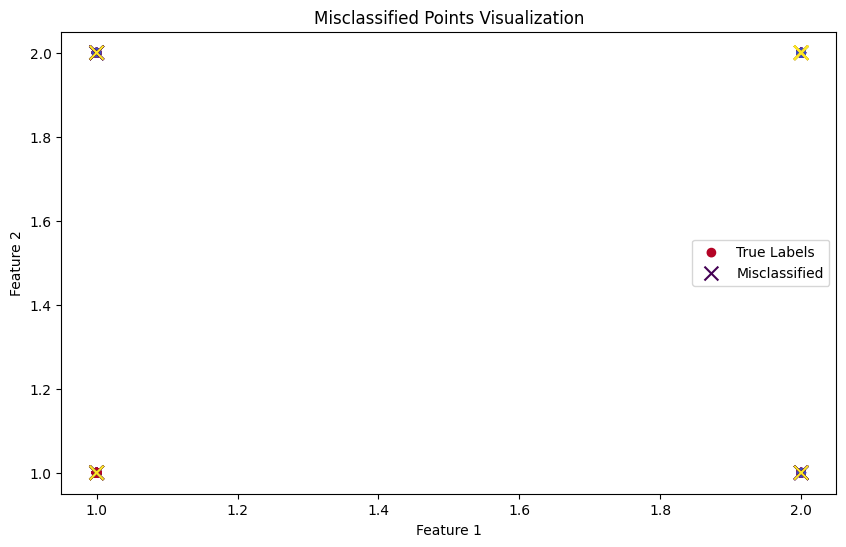

In [49]:
import matplotlib.pyplot as plt

# Ensure misclassified is a DataFrame and contains the same columns as X_valid
misclassified = X_valid.loc[y_valid != y_pred_valid]
misclassified_labels = y_valid[y_valid != y_pred_valid]

# Plot points of class 0 and class 1
plt.figure(figsize=(10, 6))

# Plot the true labels
plt.scatter(X_valid.iloc[:, 0], X_valid.iloc[:, 1], c=y_valid, cmap='coolwarm', label="True Labels")

# Plot the misclassified points with a distinct marker
plt.scatter(misclassified.iloc[:, 0], misclassified.iloc[:, 1], c=misclassified_labels, marker='x', s=100, edgecolors='black', label="Misclassified")

# Adding titles and labels
plt.title("Misclassified Points Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()
